# Diabetes Risk Prediction:
we dealt with the original data set ( https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv ) that was containing 330 features, and we chose 22 risk factors related to diabetes according to notebook (https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook)

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn import metrics
from sklearn import tree 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTEENN

Reading the data set:

In [ ]:
# db = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
db =pd.read_csv("/content/diabetes_ours.csv")
db.head()


,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
0,5.0,15.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,1.0,1.0,0.0,9.0,40.0,0.0,0.0,1.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,25.0,0.0,0.0,0.0,1.0
2,5.0,30.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,8.0,1.0,0.0,1.0,1.0,0.0,9.0,28.0,0.0,1.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,11.0,27.0,0.0,1.0,1.0,1.0
4,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,11.0,24.0,0.0,1.0,1.0,1.0


## Exploring data

Get a general overview 

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   GenHlth               229781 non-null  float64
 1   PhysHlth              229781 non-null  float64
 2   MentHlth              229781 non-null  float64
 3   AnyHealthcare         229781 non-null  float64
 4   NoDocbcCost           229781 non-null  float64
 5   HighChol              229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   Diabetes              229781 non-null  float64
 8   Sex                   229781 non-null  float64
 9   Education             229781 non-null  float64
 10  Income                229781 non-null  float64
 11  DiffWalk              229781 non-null  float64
 12  Smoker                229781 non-null  float64
 13  HighBP                229781 non-null  float64
 14  CholCheck             229781 non-null  float64
 15  

In [ ]:
db.describe()

,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000
mean,2.601151,4.675178,3.505373,0.946075,0.092810,0.441760,0.044756,0.172886,0.439231,4.980568,5.890383,0.185507,0.465661,0.454441,0.959535,0.103216,8.086582,28.68567,0.060710,0.612966,0.794813,0.733355
std,1.064685,9.046568,7.713725,0.225871,0.290167,0.496598,0.206767,0.378150,0.496295,0.992895,2.092477,0.388709,0.498821,0.497921,0.197047,0.304241,3.093809,6.78636,0.238798,0.487073,0.403839,0.442206
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,24.00000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,27.00000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,32.00000,0.000000,1.000000,1.000000,1.000000
max,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,98.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Is the dataset balanced?
db['Diabetes'].value_counts()

0.0    190055
1.0     39726
Name: Diabetes, dtype: int64

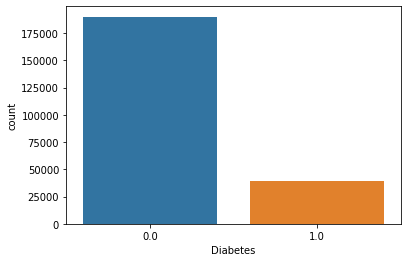

In [ ]:
sns.countplot(x='Diabetes',data = db)

As it appears, the data set is highly imbalanced toward the non-diabetic class, we will use the SMOTEENN to fix this.


In [ ]:
correlation = db.corr()
correlation['Diabetes']

GenHlth                 0.282328
PhysHlth                0.158697
MentHlth                0.058826
AnyHealthcare           0.023756
NoDocbcCost             0.025940
HighChol                0.204418
Stroke                  0.097685
Diabetes                1.000000
Sex                     0.030797
Education              -0.108504
Income                 -0.147809
DiffWalk                0.208126
Smoker                  0.046262
HighBP                  0.260346
CholCheck               0.076190
HeartDiseaseorAttack    0.167184
Age                     0.185479
BMI                     0.211155
HvyAlcoholConsump      -0.066111
Fruits                 -0.024968
Veggies                -0.043339
PhysActivity           -0.102391
Name: Diabetes, dtype: float64

# Determining the Important features:
We will first run the models with all the 22 features and then later in this notebook we will choose the most important features according to the correlation coeffiecients presented above.

In [ ]:
columns = ['HighBP' ,'HighChol' ,'CholCheck' ,'BMI','Smoker','Stroke' ,'HeartDiseaseorAttack','PhysActivity','Fruits' ,'Veggies','HvyAlcoholConsump','AnyHealthcare',
'NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

X = db[columns] 
y = db['Diabetes']

In [ ]:
print(X.shape)
print(y.shape)

(229781, 21)
(229781,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


# Fixing the problem of imbalanced Data set:





### Second Method:

Using SMOTETomek

In [ ]:
#from imblearn.combine import SMOTETomek
#sm = SMOTETomek()
#x_res_to, y_res_to = sm.fit_resample(X,y)
#X_train_to , X_test_to , y_train_to , y_test_to = train_test_split(x_res_to,y_res_to,test_size = 0.3 , random_state = 75)
#print(X_train.shape)
#print(X_test.shape)

### Third Method:

Using SMOTEENN to create a balanced version of the data set.

In [ ]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X,y)

X_train , X_test , y_train , y_test = train_test_split(x_resampled,y_resampled,test_size = 0.3 , random_state = 75)
print(X_train.shape)
print(X_test.shape)

(191541, 21)
(82090, 21)


## Choosing the best base model using cross validation

Trying different classification models and using cross validation to choose  the best among them.

In [ ]:
# KNN Model
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv = 5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

# DTrees
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

# Logistic regression 
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 92.61
Average Score for DTrees = 90.27
Average Score for Logistic Regreesion = 85.25%


## Model Evaluation:

In [ ]:
# Random forsest
RF = RandomForestClassifier()
scores = cross_val_score(RF, X_train, y_train, cv = 5)
print('Average Score for Random forsest = {}'.format(np.round(scores.mean()*100,2)))

Average Score for Random forsest = 94.38


In [ ]:
RF.fit(X_train, y_train)
yRF_pred = RF.predict(X_test)

print(classification_report(y_test,yRF_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     34387
           1       0.95      0.96      0.95     47703

    accuracy                           0.95     82090
   macro avg       0.95      0.94      0.94     82090
weighted avg       0.95      0.95      0.95     82090



In [ ]:
# KNN

KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)
yKNN_pred = KNN_clf.predict(X_test)
print(classification_report(y_test,yKNN_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     34387
           1       0.92      0.98      0.95     47703

    accuracy                           0.94     82090
   macro avg       0.94      0.93      0.94     82090
weighted avg       0.94      0.94      0.94     82090



Implmenting a bagging Model with KNN classifier as a base Model: 

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator = KNeighborsClassifier() ,n_estimators = 10 , random_state = 0)


In [ ]:
clf.fit(X_train, y_train)
yrf_pred = clf.predict(X_test)
yrf_pred
print(classification_report(y_test,yrf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93     34387
           1       0.92      0.98      0.95     47703

    accuracy                           0.94     82090
   macro avg       0.95      0.93      0.94     82090
weighted avg       0.94      0.94      0.94     82090



##Hyper parameter tuning
We will start by tunning the hyperparamters for random forest, as it is the best model for accuracy and recall, manually and then we will use Randmizedsearch to find the best combination of Parametrs.

In [ ]:
# Random forsest
## best parameters 
RF = RandomForestClassifier(n_estimators=100,max_depth=25)
scores = cross_val_score(RF, X_train, y_train, cv = 5)
print('Average Score for Random forsest = {}'.format(np.round(scores.mean()*100,2)))

Average Score for Random forsest = 94.17


In [ ]:
parameters = {
    "n_estimators":[50,100,250,300],
     "max_depth":[20,21,22,23,24,25,None],    ## as the best max_depth was 25 
    "max_features": ['auto', 'sqrt']}

RF_model = RandomForestClassifier()

RF_model = RandomizedSearchCV(RF_model, parameters , n_iter = 5, cv = 10 , scoring='accuracy')
RF_model.fit(X_train, y_train)
print(RF_model.best_score_)
print(RF_model.best_params_)

0.945839271342224
{'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# Diabetes Risk Prediction:
we dealt with the original data set ( https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv ) that was containing 330 features, and we chose 22 risk factors related to diabetes according to notebook (https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook)RF_best = RF_model.best_estimator_
RF_best.fit(X_train, y_train)
YRF_best_pred = RF_best.predict(X_test)

print(classification_report(y_test , YRF_best_pred, labels = [0,1]))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93     34387
           1       0.95      0.96      0.95     47703

    accuracy                           0.94     82090
   macro avg       0.94      0.94      0.94     82090
weighted avg       0.94      0.94      0.94     82090



# ROC AUC Curves and scores

The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. It does mean that a larger area under the curve (AUC) is usually better.



In [ ]:
def plot_roc_curve(false_positive_rate, true_positive_rate):
    """ Function to plot the ROC curve
    """
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [ ]:
# compute true positive rate and false positive rate
# KNN_clf
fp1, tp1, thresholds = roc_curve(y_test, KNN_clf.predict_proba(X_test)[:,1])
# RF_best 
fp2, tp2, thresholds = roc_curve(y_test, RF_best.predict_proba(X_test)[:,1])
# clf -----> bagging model 
fp3, tp3, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])


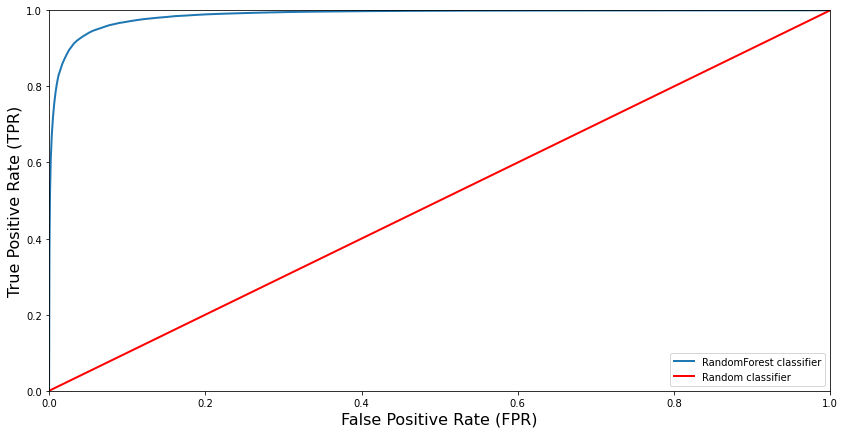

In [ ]:
plt.figure(figsize=(14, 7))

#plot_roc_curve(fp1, tp1)
plot_roc_curve(fp2, tp2)
#plot_roc_curve(fp3, tp3)

plt.plot([0, 1], [0, 1], 'r', linewidth = 2)

plt.legend(['RandomForest classifier','Random classifier'])

In [ ]:
#auc1 = roc_auc_score(y_test, KNN_clf.predict_proba(X_test)[:,1])
auc2 = roc_auc_score(y_test, RF_best.predict_proba(X_test)[:,1])
#auc3 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

#print("AUC score for KNN is ", auc1, "for Random classifier is ", auc2, "and for Bagging with KNN", auc3 )
print("AUC score for RandomForest classifier is ", auc2)

AUC score for RandomForest classifier is  0.9871535902624181


# Feature selection:

Removing the features that has correlation less than abs(0.09) with the target and using the rest as input for the Random forest Classifier.

In [ ]:
columns = ['HighBP' ,'HighChol','BMI','Stroke' ,'HeartDiseaseorAttack','PhysActivity','GenHlth','PhysHlth','DiffWalk','Age','Education','Income' ]

X_min = db[columns] 
y_min = db['Diabetes']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_min)
X_min = scaler.transform(X_min)

In [ ]:
sm = SMOTEENN()
x_min, y_min = sm.fit_resample(X_min,y_min)

Xmin_train , Xmin_test , ymin_train , ymin_test = train_test_split(x_min,y_min,test_size = 0.3 , random_state = 75)
print(Xmin_train.shape)
print(Xmin_test.shape)

(178341, 12)
(76432, 12)


In [ ]:
# KNN Model
clf = KNeighborsClassifier()
scores = cross_val_score(clf, Xmin_train, ymin_train , cv = 5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

# DTrees
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, Xmin_train, ymin_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

# Logistic regression 
clf = LogisticRegression()
scores = cross_val_score(clf, Xmin_train, ymin_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 92.87
Average Score for DTrees = 92.74
Average Score for Logistic Regreesion = 85.85%


In [ ]:
# Random forsest
RF_min = RandomForestClassifier()
scores = cross_val_score(RF_min, Xmin_train, ymin_train, cv = 5)
print('Average Score for Random forsest = {}'.format(np.round(scores.mean()*100,2)))

Average Score for Random forsest = 95.75


In [ ]:
RF_min.fit(Xmin_train, ymin_train)
yminRF_pred = RF_min.predict(Xmin_test)

print(classification_report(ymin_test,yminRF_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     35861
           1       0.96      0.97      0.96     40571

    accuracy                           0.96     76432
   macro avg       0.96      0.96      0.96     76432
weighted avg       0.96      0.96      0.96     76432



Comment: AS it can be seen, removing the weakly correlated features did actualy improve the accuracy of the Model. 

# Dropinng more features:
In this iteration, we will choose the most important 10 features for the training of the model.

In [ ]:
columns = ['HighBP' ,'HighChol','BMI','HeartDiseaseorAttack','GenHlth','PhysHlth','DiffWalk','Age','Education','Income' ]

X_min2 = db[columns] 
y_min2 = db['Diabetes']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_min2)
X_min2 = scaler.transform(X_min2)

In [ ]:
sm = SMOTEENN()
x_min2, y_min2 = sm.fit_resample(X_min2,y_min2)

Xmin2_train , Xmin2_test , ymin2_train , ymin2_test = train_test_split(x_min2,y_min2,test_size = 0.3 , random_state = 75)
print(Xmin2_train.shape)
print(Xmin2_test.shape)

(175074, 10)
(75032, 10)


In [ ]:
# KNN Model
clf = KNeighborsClassifier()
scores = cross_val_score(clf, Xmin2_train, ymin2_train , cv = 5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

# DTrees
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, Xmin2_train, ymin2_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

# Logistic regression 
clf = LogisticRegression()
scores = cross_val_score(clf, Xmin2_train, ymin2_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 92.92
Average Score for DTrees = 93.44
Average Score for Logistic Regreesion = 85.68%


In [ ]:
# Random forsest
RF_min2 = RandomForestClassifier()
scores = cross_val_score(RF_min2, Xmin2_train, ymin2_train, cv = 5)
print('Average Score for Random forsest = {}'.format(np.round(scores.mean()*100,2)))

Average Score for Random forsest = 95.97


In [ ]:
RF_min2.fit(Xmin2_train, ymin2_train)
ymin2RF_pred = RF_min2.predict(Xmin2_test)

print(classification_report(ymin2_test,ymin2RF_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     36400
           1       0.96      0.97      0.97     38632

    accuracy                           0.97     75032
   macro avg       0.97      0.97      0.97     75032
weighted avg       0.97      0.97      0.97     75032

